In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import bnlearn as bn
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

Pre-Processing, Feature Engineering

In [17]:
dataDf = pd.read_excel("data.xlsx")
columnNames = dataDf.columns

dataDf.dropna(inplace=True)
dataDf['GENDER'] = dataDf['GENDER'].replace(["Male", "Female"], [1,2])
for i in range(4, 43-9):
    dataDf = dataDf.astype({dataDf.columns[i]: str})

for c in range(4, 18):
    dataDf.iloc[0][columnNames[c]] = dataDf.iloc[0][columnNames[c]].split('.')

for i in range(len(dataDf)):
    row = dataDf.iloc[i]
    for c in range(4, 18):
        row[columnNames[c]] = row[columnNames[c]].strip(".")
        row[columnNames[c]] = row[columnNames[c]].split('.')
    dataDf.iloc[i] = row
for i in range(len(dataDf)):
    for c in range(4, 18):
        dataDf = dataDf.explode(columnNames[c])

dropList = ['Questioinnaire number ', 'AGE', 'HOME LANGUAGE']
dataDf = dataDf.drop(columns=dropList)

dataDf['PASSED'] = 0
dataDf.loc[dataDf['FNL ILS'] >= 50, 'PASSED'] = 1

columns = dataDf.columns

KeyboardInterrupt: 

In [ ]:
dataDf['PASSED'] = 0
dataDf.loc[dataDf['FNL ILS'] >= 50, 'PASSED'] = 1

In [ ]:
dataDf

,GENDER,What career would you like to pursue when you complete your studies,Broader categories for career aspirations,What factor/s triggered your interest in your chosen career pursuit,Broad category of the factors that influenced career aspiration,To what extent are you still interested in this career,Elaborate,What level of support did you have from your family for your studies last year,What level of support do you have from your family for your studies this year,How does the workload that you are currently experiencing match up with the high school workload,...,Exam Bl 1,FNL BL 1,Exam Bl 2,FNL BL 2,FNL SEM 1,Exam Bl 3,FNL BL3,FNL BL 4,FNL ILS,PASSED
4,1,4,2,2,1,1,3,8,1,2,...,50.0,50.3,39.0,42.500000,46.400000,40.0,48.634444,31.536585,43.242757,0
4,1,4,2,2,1,1,3,8,1,2,...,50.0,50.3,39.0,42.500000,46.400000,40.0,48.634444,31.536585,43.242757,0
4,1,4,2,2,1,1,3,8,1,2,...,50.0,50.3,39.0,42.500000,46.400000,40.0,48.634444,31.536585,43.242757,0
4,1,4,2,2,1,1,3,8,1,2,...,50.0,50.3,39.0,42.500000,46.400000,40.0,48.634444,31.536585,43.242757,0
4,1,4,2,2,1,1,3,8,1,2,...,50.0,50.3,39.0,42.500000,46.400000,40.0,48.634444,31.536585,43.242757,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2,21,2,89,4,1,36,4,14,0,...,77.0,77.7,78.0,78.016667,77.858333,74.5,77.569444,41.080488,68.591650,1
117,2,21,2,89,4,1,36,4,14,0,...,77.0,77.7,78.0,78.016667,77.858333,74.5,77.569444,41.080488,68.591650,1
117,2,21,2,89,4,1,36,4,14,0,...,77.0,77.7,78.0,78.016667,77.858333,74.5,77.569444,41.080488,68.591650,1
117,2,21,2,89,4,1,36,4,14,0,...,77.0,77.7,78.0,78.016667,77.858333,74.5,77.569444,41.080488,68.591650,1


Train and Test Data, Data Preperation

In [ ]:
from sklearn.model_selection import train_test_split
trainDf, testDf = train_test_split(dataDf, test_size=0.2)
dropList = [' Exam Bl 1', 'FNL BL 1', 'FNL BL 2', 'FNL SEM 1', ' Exam Bl 3', 'FNL BL3', 'FNL BL 4', 'Exam Bl 2']
trainDf = trainDf.drop(columns=dropList)

In [ ]:
trainDf

,GENDER,What career would you like to pursue when you complete your studies,Broader categories for career aspirations,What factor/s triggered your interest in your chosen career pursuit,Broad category of the factors that influenced career aspiration,To what extent are you still interested in this career,Elaborate,What level of support did you have from your family for your studies last year,What level of support do you have from your family for your studies this year,How does the workload that you are currently experiencing match up with the high school workload,...,1.My teachers encouraged me to do my best,2.My science teachers encouraged me to learn more about science,3.My science teachers made science interesting,4.My science teachers were enthusiastic about science,1.I do not enjoy visiting science museums and science centres,2.Visiting science museums and exhibits makes me consider a career in science,3.Visiting science museums and exhibits makes me want to learn more about the science topic,4.I prefer science class than visiting museums and centres,FNL ILS,PASSED
81,2,1,2,74,4,1,43,4,10,2,...,1.0,1.0,1.0,1.0,4.0,1.0,1.0,4.0,42.318733,0
81,2,27,2,11,1,1,43,6,10,0,...,1.0,1.0,1.0,1.0,4.0,1.0,1.0,4.0,42.318733,0
81,2,27,1,74,12,1,43,6,10,2,...,1.0,1.0,1.0,1.0,4.0,1.0,1.0,4.0,42.318733,0
81,2,1,1,74,4,1,43,6,10,0,...,1.0,1.0,1.0,1.0,4.0,1.0,1.0,4.0,42.318733,0
81,2,9,2,29,1,1,43,4,10,2,...,1.0,1.0,1.0,1.0,4.0,1.0,1.0,4.0,42.318733,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2,27,1,11,12,1,43,6,10,0,...,1.0,1.0,1.0,1.0,4.0,1.0,1.0,4.0,42.318733,0
8,2,51,1,4,4,2,2,1,1,0,...,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,43.242642,0
81,2,1,2,42,4,1,43,6,10,0,...,1.0,1.0,1.0,1.0,4.0,1.0,1.0,4.0,42.318733,0
68,2,76,2,22,15,1,39,1,1,0,...,2.0,3.0,3.0,2.0,3.0,2.0,2.0,3.0,58.417835,1


In [ ]:
trainDf.describe()

,GENDER,FNL ILS,PASSED
count,11969.000000,11969.000000,11969.000000
mean,1.937589,45.934187,0.206868
std,0.241911,7.157388,0.405077
min,1.000000,34.980047,0.000000
25%,2.000000,42.318733,0.000000
50%,2.000000,42.318733,0.000000
75%,2.000000,43.242642,0.000000
max,2.000000,69.979939,1.000000


In [ ]:
dfHotTrain, dfNumTrain = bn.df2onehot(trainDf)
dfHotTest, dfNumTest = bn.df2onehot(testDf)


[df2onehot] >Auto detecting dtypes.


100%|██████████| 33/33 [00:00<00:00, 48.03it/s]


[df2onehot] >Set dtypes in dataframe..


100%|██████████| 33/33 [00:00<00:00, 141.01it/s]


[df2onehot] >Total onehot features: 276

[df2onehot] >Auto detecting dtypes.


100%|██████████| 41/41 [00:00<00:00, 200.98it/s]


[df2onehot] >Set dtypes in dataframe..


100%|██████████| 41/41 [00:00<00:00, 344.54it/s]

[df2onehot] >Total onehot features: 205


In [ ]:
dfNumTrain

,GENDER,What career would you like to pursue when you complete your studies,Broader categories for career aspirations,What factor/s triggered your interest in your chosen career pursuit,Broad category of the factors that influenced career aspiration,To what extent are you still interested in this career,Elaborate,What level of support did you have from your family for your studies last year,What level of support do you have from your family for your studies this year,How does the workload that you are currently experiencing match up with the high school workload,...,4.My friends perform science experiments outside school,1.My teachers encouraged me to do my best,2.My science teachers encouraged me to learn more about science,3.My science teachers made science interesting,4.My science teachers were enthusiastic about science,1.I do not enjoy visiting science museums and science centres,2.Visiting science museums and exhibits makes me consider a career in science,3.Visiting science museums and exhibits makes me want to learn more about the science topic,4.I prefer science class than visiting museums and centres,PASSED
0,1,1,3,24,9,1,18,4,2,3,...,4,1,1,1,1,4,1,1,4,0
1,1,9,3,3,1,1,18,6,2,1,...,4,1,1,1,1,4,1,1,4,0
2,1,9,1,24,3,1,18,6,2,3,...,4,1,1,1,1,4,1,1,4,0
3,1,1,1,24,9,1,18,6,2,1,...,4,1,1,1,1,4,1,1,4,0
4,1,22,3,13,1,1,18,4,2,3,...,4,1,1,1,1,4,1,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,1,9,1,3,3,1,18,6,2,1,...,4,1,1,1,1,4,1,1,4,0
11965,1,12,1,17,9,2,6,1,1,1,...,4,3,2,3,2,4,3,2,2,0
11966,1,1,3,18,9,1,18,6,2,1,...,4,1,1,1,1,4,1,1,4,0
11967,1,17,3,10,4,1,16,1,1,1,...,3,2,3,3,2,3,2,2,3,1


In [ ]:
dfNumTarget = dfNumTrain.pop('PASSED')

In [ ]:
xTrain, xVal, zTrain, zVal = train_test_split(dfNumTrain, dfNumTarget, test_size=0.2, random_state=0)
valid = pd.concat([xVal, zVal], axis='columns')
dfNum = pd.concat([xTrain, zTrain], axis='columns')

In [ ]:
dfNum

,GENDER,What career would you like to pursue when you complete your studies,Broader categories for career aspirations,What factor/s triggered your interest in your chosen career pursuit,Broad category of the factors that influenced career aspiration,To what extent are you still interested in this career,Elaborate,What level of support did you have from your family for your studies last year,What level of support do you have from your family for your studies this year,How does the workload that you are currently experiencing match up with the high school workload,...,4.My friends perform science experiments outside school,1.My teachers encouraged me to do my best,2.My science teachers encouraged me to learn more about science,3.My science teachers made science interesting,4.My science teachers were enthusiastic about science,1.I do not enjoy visiting science museums and science centres,2.Visiting science museums and exhibits makes me consider a career in science,3.Visiting science museums and exhibits makes me want to learn more about the science topic,4.I prefer science class than visiting museums and centres,PASSED
6923,1,8,1,5,9,1,3,1,1,2,...,4,2,2,2,2,3,2,2,3,1
3132,0,11,3,27,1,1,12,8,1,1,...,3,1,1,1,1,4,1,1,1,0
1874,1,1,1,3,9,1,18,6,2,3,...,4,1,1,1,1,4,1,1,4,0
1067,1,1,3,13,9,1,18,6,2,3,...,4,1,1,1,1,4,1,1,4,0
9637,1,9,4,24,1,1,18,6,2,3,...,4,1,1,1,1,4,1,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,1,9,1,3,9,1,18,4,2,3,...,4,1,1,1,1,4,1,1,4,0
3264,1,10,1,3,9,1,19,1,1,3,...,4,1,1,1,1,3,2,2,1,0
9845,1,12,4,17,9,2,6,1,1,1,...,4,3,2,3,2,4,3,2,2,0
10799,1,1,1,18,9,1,18,6,2,1,...,4,1,1,1,1,4,1,1,4,0


In [ ]:
def getAccuracy(model, df, col):
    prediction = bn.predict(model, df, variables=[col])
    print("Prediction:", prediction)
    accuracy = accuracy_score(df[col], prediction[col])
    print('Accuracy:', accuracy)
    return accuracy

In [ ]:
DAG = bn.structure_learning.fit(dfNum, methodtype='hc', root_node='PASSED', bw_list_method='nodes', verbose=3)
G = bn.plot(DAG)
model = bn.parameter_learning.fit(DAG, dfNum, verbose=3)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]


KeyboardInterrupt: 

In [ ]:
model

{'model': <pgmpy.models.BayesianNetwork.BayesianNetwork at 0x1b681a659c0>,
 'adjmat': target                                              GENDER  \
 source                                                       
 GENDER                                               False   
 What career would you like to pursue when you c...   False   
 Broader categories for career aspirations            False   
 What factor/s triggered your interest in your c...   False   
 Broad category of the factors that influenced c...   False   
 To what extent are you still interested in this...   False   
 Elaborate                                            False   
 What level of support did you have from your fa...   False   
 What level of support do you have from your fam...   False   
 How does the workload that you are currently ex...   False   
  Describe your study/learning approach that you...   False   
 Is your study/learning approach at uni differen...   False   
 Is your learning approach at uni

In [ ]:
acc1 = getAccuracy(model, valid, 'PASSED')

[bnlearn]> Remaining columns for inference: 31


100%|██████████| 2391/2391 [00:40<00:00, 58.87it/s]

Prediction:       PASSED         p
0          0  1.000000
1          0  1.000000
2          1  0.999980
3          1  1.000000
4          1  1.000000
...      ...       ...
2389       0  1.000000
2390       0  1.000000
2391       0  1.000000
2392       0  1.000000
2393       1  0.999999

[2394 rows x 2 columns]
Accuracy: 1.0


[bnlearn] >Filter variables (nodes) on black_list..
[bnlearn] >Number of features after white/black listing: 32
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


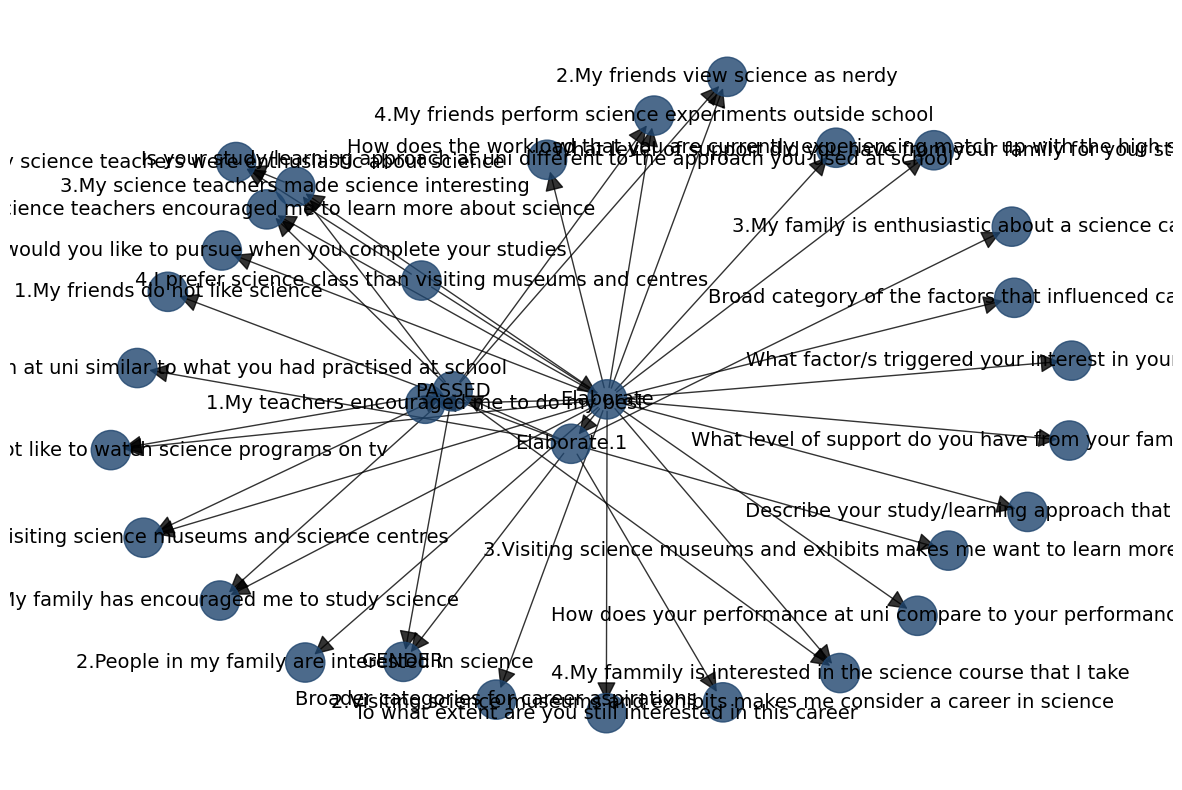

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Elaborate:
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
[bnlearn] >CPD of What career would you like to pursue when you complete your studies:
+-----+---------------------+
| ... | Elaborate(23)       |
+-----+---------------------+
| ... | 0.03375641371860656 |
+-----+---------------------+
| ... | 0.03375641371860656 |
+-----+---------------------+
| ... | 0.03375641371860656 |
+-----+---------------------+
| ... | 0.03

In [ ]:
DAG2 = bn.structure_learning.fit(dfNum, methodtype='hc', black_list=['SibSp'], root_node='PASSED', bw_list_method='nodes', verbose=4)

# Plot
G2 = bn.plot(DAG2)

# Parameter learning
model2 = bn.parameter_learning.fit(DAG2, dfNum, verbose=4)

In [ ]:
query = bn.inference.fit(model, variables=['PASSED'], evidence={'GENDER': 1})
print(query)
print(query.df)

bn.print_CPD(model)

[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------+----------+
|    |   PASSED |        p |
+====+==========+==========+
|  0 |        0 | 0.806417 |
+----+----------+----------+
|  1 |        1 | 0.193583 |
+----+----------+----------+
+-----------+---------------+
| PASSED    |   phi(PASSED) |
+===========+===============+
| PASSED(0) |        0.8064 |
+-----------+---------------+
| PASSED(1) |        0.1936 |
+-----------+---------------+
   PASSED         p
0       0  0.806417
1       1  0.193583
[bnlearn] >Data is stored in [query.df]
+----+-------------+--------------------------------------------------------------+------------+
|    |   Elaborate |   4.I prefer science class than visiting museums and centres |          p |
+====+=============+==============================================================+============+
|  0 |           0 |                                                            0 | 0.0196541  |
+----+-------------+---------------------------------------

In [ ]:
#seperate categories and train separately